## Metallicity 

In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
from array import array
import pickle
plt.ion()

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


#load in the database simulation (also a good check that you are reading the right database file!)
sim = db.get_simulation('cosmo25')

In [2]:
##getting the last time step
step = db.get_timestep('cosmo25/%8192')

In [3]:
tot_gas_mass, tot_stellar_mass, stellar_mass_prof, gas_mass_prof, stellar_metal, gas_metal, Mtot, halo_num =  step.calculate_all('Mgas','Mstar','star_mass_profile', 'gas_mass_profile',
                   'star_metal_profile',
                   'gas_metal_profile',
                   'Mvir',
                   'halo_number()')
                    

In [4]:
solar_metal = 0.0134

In [5]:
def get_metal(arr1, metal_arr, tot_arr, i):
    delta_array = []
    delta_array = arr1[i][1:]-arr1[i][:-1]
    delta_array = np.append(arr1[i][0], delta_array)
    
    x = (np.nansum(delta_array * metal_arr[i]))/(tot_arr[i])
    
    return x

In [6]:
print(get_metal(stellar_mass_prof, stellar_metal, tot_stellar_mass, 0))

0.023921865813853773


In [7]:
star_mass_dm = []
star_metal_dm = []
plotting = []

loop = np.arange(len(stellar_metal))

for i in loop:
    star_mass_dm = np.append(star_mass_dm, tot_stellar_mass[i])
    star_metal_dm = np.append(star_metal_dm, get_metal(stellar_mass_prof, stellar_metal, tot_stellar_mass, i))

In [8]:
#star metal in terms of solar metal

star_metal_solar = star_metal_dm/solar_metal

In [9]:
stellar_metal_data = {"tot_stellar_mass": star_mass_dm,
                      "tot_stellar_metal": star_metal_dm,
                      "metal_star_solar": star_metal_solar,
                      "halo_number": halo_num,
                      "notes": "stellar mass and stellar metals for the final timestep"}

f = open("./Data/stellar_metal.pkl", "wb")
pickle.dump(stellar_metal_data, f)
f.close()

f = open("./Data/stellar_metal.pkl", "rb")
save_stellar_metal = pickle.load(f)
f.close()

In [10]:
c_stellar_mass = tot_stellar_mass/Mtot

In [11]:
plot_stellar_metal = save_stellar_metal["tot_stellar_metal"]
plot_stellar_mass = save_stellar_metal["tot_stellar_mass"]

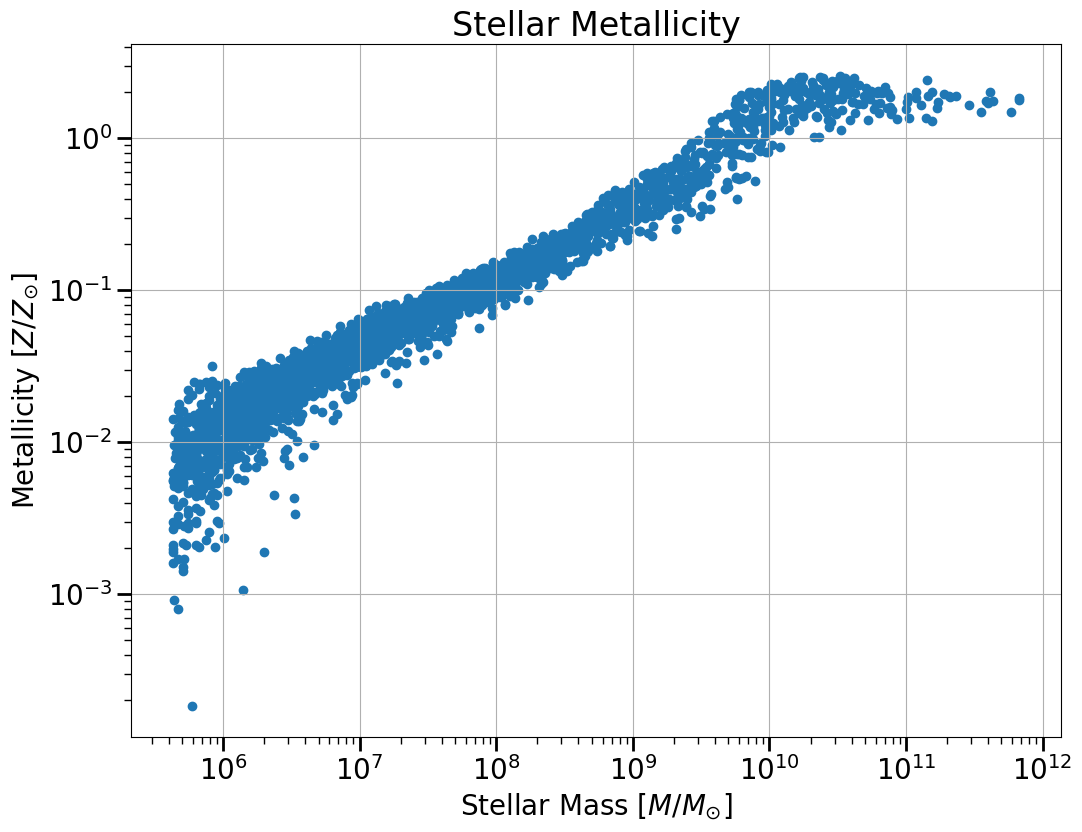

In [12]:
plt.scatter(plot_stellar_mass, plot_stellar_metal/solar_metal)
            #c= np.log10(c_stellar_mass) ,cmap='magma', vmin = -4, vmax = 0)

plt.xscale('log')
plt.yscale('log')

plt.title('Stellar Metallicity')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Metallicity $[Z/Z_{\odot}]$')
#plt.colorbar(label = 'log ratio of stellar mass to halo mass')

plt.grid()
#plt.show()
plt.savefig('./Pictures/stellar_metal_(all).png')

In [13]:
gas_mass_dm = []
gas_metal_dm = []


loop = np.arange(len(gas_metal))

for i in loop:
    gas_mass_dm = np.append(gas_mass_dm, tot_gas_mass[i])
    gas_metal_dm = np.append(gas_metal_dm, get_metal(gas_mass_prof, gas_metal, tot_gas_mass, i))

In [14]:
#gas metal in terms of solar metal

gas_metal_solar = gas_metal_dm/solar_metal

In [15]:
gas_metal_data = {"tot_gas_mass" : gas_mass_dm,
                  "tot_gas_metal": gas_metal_dm,
                  "metal_gas_solar": gas_metal_solar,
                  "halo_number": halo_num,
                  "note":"total gas mass and gas metals in last time step"}

f = open("./Data/gas_metal.pkl", "wb")
pickle.dump(gas_metal_data, f)
f.close()

f = open("./Data/gas_metal.pkl", "rb")
save_gas_metal = pickle.load(f)
f.close()

In [16]:
c_gas_mass = tot_gas_mass/Mtot

In [17]:
plot_gas_mass = save_gas_metal["tot_gas_mass"]
plot_gas_metal = save_gas_metal["metal_gas_solar"]

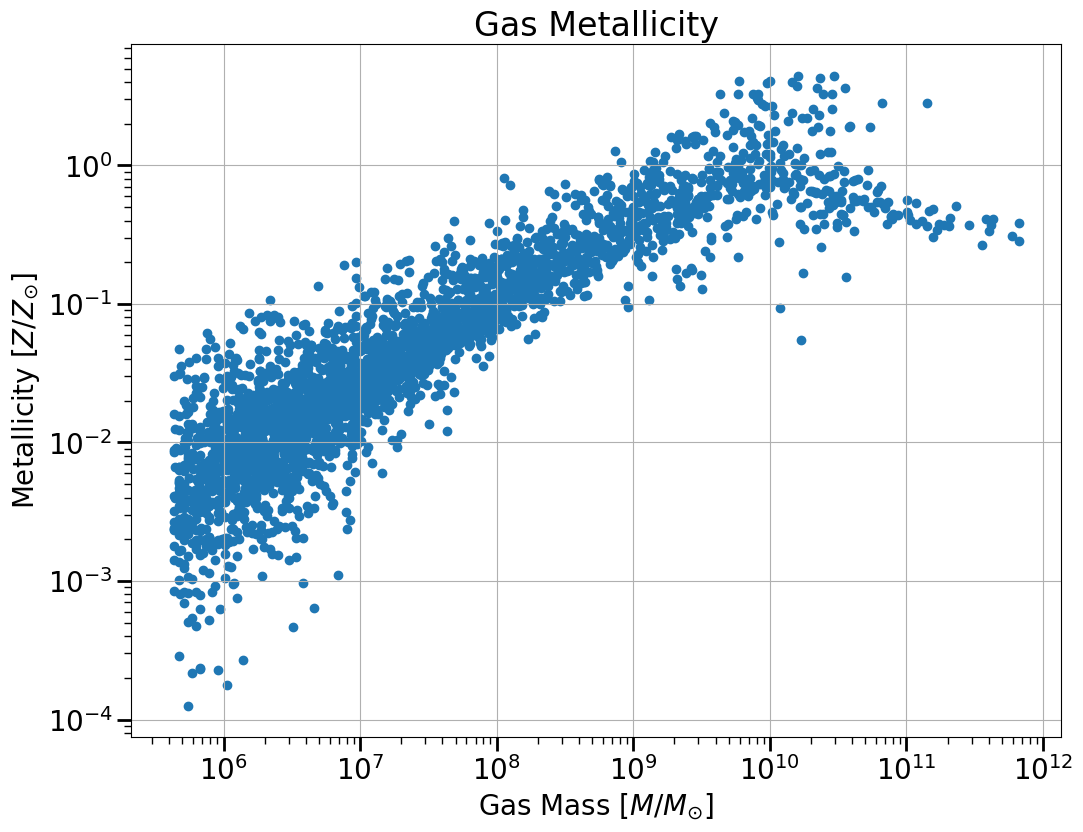

In [21]:
plt.scatter(plot_stellar_mass, gas_metal_dm/solar_metal)
            #c= np.log10(c_gas_mass) ,cmap='magma', vmin = -3.5, vmax = 0)

plt.xscale('log')
plt.yscale('log')

plt.title('Gas Metallicity')
plt.xlabel('Gas Mass $[M/M_{\odot}]$')
plt.ylabel('Metallicity $[Z/Z_{\odot}]$')
#plt.colorbar(label = 'log ratio of gas mass to halo mass')

plt.grid()
#plt.show()
plt.savefig('./Pictures/gas_metal.png')

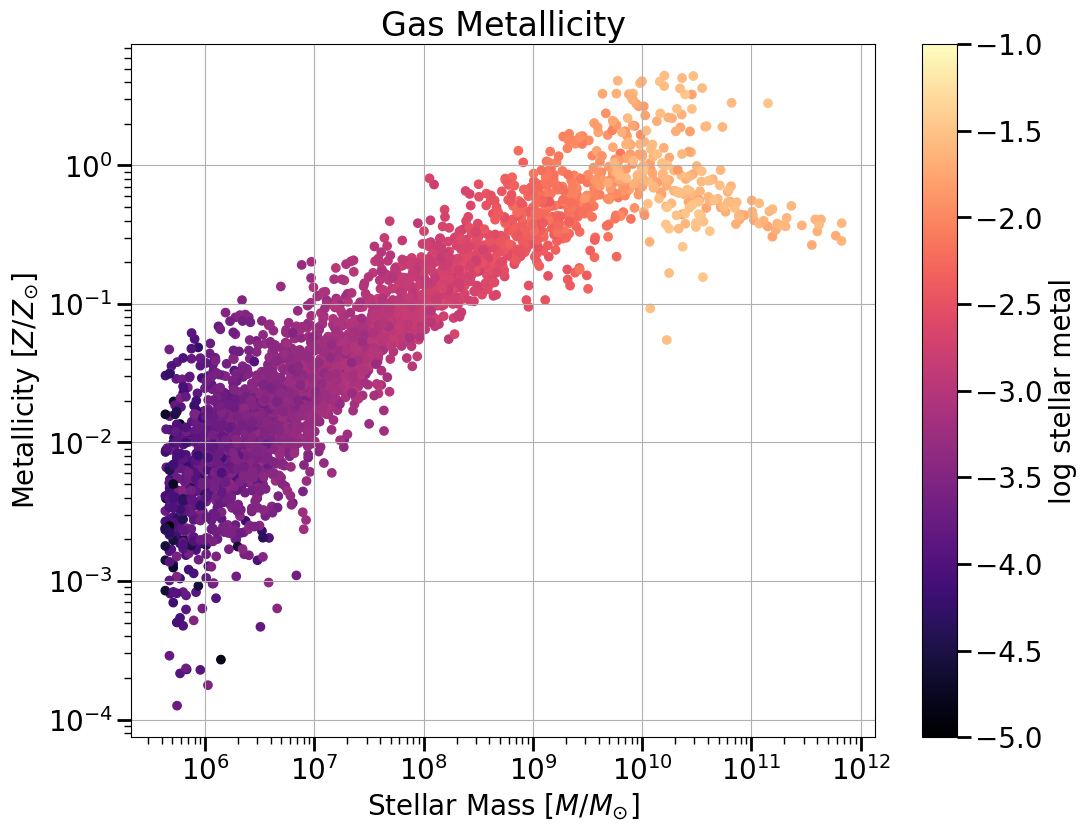

In [19]:
plt.scatter(plot_stellar_mass, gas_metal_dm/solar_metal,
            c= np.log10(plot_stellar_metal) ,cmap='magma', vmin = -5, vmax = -1)

plt.xscale('log')
plt.yscale('log')

plt.title('Gas Metallicity')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Metallicity $[Z/Z_{\odot}]$')
plt.colorbar(label = 'log stellar metal')

plt.grid()
#plt.show()
plt.savefig('./Pictures/gas_metal_coloured.png')

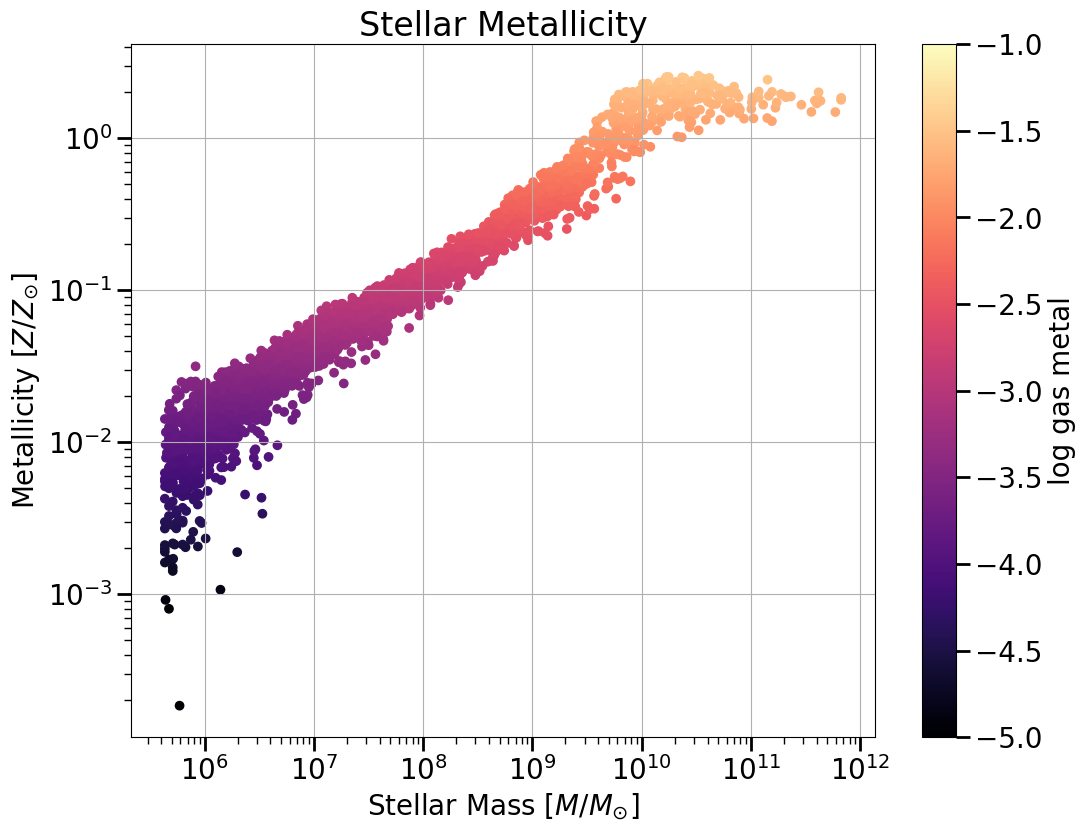

In [20]:
plt.scatter(plot_stellar_mass, plot_stellar_metal/solar_metal,
            c= np.log10(plot_stellar_metal) ,cmap='magma', vmin = -5, vmax = -1)

plt.xscale('log')
plt.yscale('log')

plt.title('Stellar Metallicity')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Metallicity $[Z/Z_{\odot}]$')
plt.colorbar(label = 'log gas metal')

plt.grid()
#plt.show()
plt.savefig('./Pictures/star_metal_coloured.png')